In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        (os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Efficient EEG Data Preprocessing with Chunking and Duplicate Removal**

In [2]:
import os
import mne
import numpy as np
import contextlib
import sys

# Function to suppress output
@contextlib.contextmanager
def suppress_stdout():
    with open(os.devnull, 'w') as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout

# Function to load and preprocess EEG data with chunking and visualization
def load_and_preprocess_eeg_silent(folder_path, label, chunk_size):
    data = []
    labels = []
    relevant_electrodes = [
        'EEG F3-Cz', 'EEG Fz-Cz', 'EEG F4-Cz',
        'EEG C3-Cz', 'EEG Cz-Cz', 'EEG C4-Cz',
        'EEG P3-Cz', 'EEG Pz-Cz', 'EEG P4-Cz'
    ]

    print(f"Loading data from: {folder_path}")
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.edf'):
            file_path = os.path.join(folder_path, file_name)
            try:
                # Suppress output while loading EDF files
                with suppress_stdout():
                    raw = mne.io.read_raw_edf(file_path, preload=True)
                    raw.pick_channels(relevant_electrodes)

                # Get the EEG data as a NumPy array
                eeg_data = raw.get_data()

                # Divide the data into chunks of size `chunk_size`
                n_samples = eeg_data.shape[1]
                for start in range(0, n_samples, chunk_size):
                    end = start + chunk_size
                    if end <= n_samples:
                        chunk = eeg_data[:, start:end]
                        data.append(chunk)
                        labels.append(label)

                # Debugging: Check the number of chunks created for this file
                print(f"\nFile: {file_name}, Shape of EEG data: {eeg_data.shape}      Number of chunks : {round(n_samples // chunk_size)}")
            except Exception as e:
                print(f"Error loading {file_name}: {e}")

    # Convert the list to a NumPy array
    data = np.array(data)
    labels = np.array(labels)
    print(f"\nCombined shape of all data: {data.shape}")
    print(f"Combined shape of all labels: {labels.shape}")
    
    
    print(f"\nCombined shape of all data Before Removig Duplicate: {data.shape}")
    print(f"Combined shape of all labels Before Removig Duplicate: {labels.shape}")

    # Remove duplicate entities from the data
    unique_data, unique_indices = np.unique(data, axis=0, return_index=True)
    unique_labels = labels[unique_indices]

    print(f"\nShape of unique data After Removig Duplicate: {unique_data.shape}")
    print(f"Shape of unique labels After Removig Duplicate: {unique_labels.shape}")

    return unique_data, unique_labels
    


In [3]:

# aths to your dataset folders
control_folder = '/kaggle/input/my-dataset/Dataset/Control EEG'
ds_folder = '/kaggle/input/my-dataset/Dataset/DS cases'

# Choose a chunk size (e.g., 10,000 samples per chunk)
chunk_size = 10000
ds_data, ds_labels = load_and_preprocess_eeg_silent(ds_folder, 1, chunk_size)

Loading data from: /kaggle/input/my-dataset/Dataset/DS cases

File: Copy of 73716.edf, Shape of EEG data: (9, 944750)      Number of chunks : 94

File: Copy of 23281f.edf, Shape of EEG data: (9, 873500)      Number of chunks : 87

File: Copy of 79426.edf, Shape of EEG data: (9, 924000)      Number of chunks : 92

File: Copy of 92446.edf, Shape of EEG data: (9, 812500)      Number of chunks : 81

File: Copy of 111822.edf, Shape of EEG data: (9, 11268250)      Number of chunks : 1126

File: Copy of 92187.edf, Shape of EEG data: (9, 914750)      Number of chunks : 91

File: Copy of 148074.edf, Shape of EEG data: (9, 827000)      Number of chunks : 82

File: Copy of 167741.edf, Shape of EEG data: (9, 913500)      Number of chunks : 91

File: Copy of 138825.edf, Shape of EEG data: (9, 938250)      Number of chunks : 93

Combined shape of all data: (1837, 9, 10000)
Combined shape of all labels: (1837,)

Combined shape of all data Before Removig Duplicate: (1837, 9, 10000)
Combined shape of a

In [4]:
control_data, control_labels = load_and_preprocess_eeg_silent(control_folder, 0, chunk_size)

Loading data from: /kaggle/input/my-dataset/Dataset/Control EEG

File: 172404.edf, Shape of EEG data: (9, 815000)      Number of chunks : 81

File: 121139.edf, Shape of EEG data: (9, 1072250)      Number of chunks : 107

File: 158439.edf, Shape of EEG data: (9, 1116750)      Number of chunks : 111

File: 71075.edf, Shape of EEG data: (9, 800000)      Number of chunks : 80

File: 71075a.edf, Shape of EEG data: (9, 898750)      Number of chunks : 89

File: 171610.edf, Shape of EEG data: (9, 1084250)      Number of chunks : 108

File: 158439a.edf, Shape of EEG data: (9, 1030250)      Number of chunks : 103

File: 113566.edf, Shape of EEG data: (9, 1173000)      Number of chunks : 117

File: 144955.edf, Shape of EEG data: (9, 1210000)      Number of chunks : 121

File: 87925.edf, Shape of EEG data: (9, 900500)      Number of chunks : 90
Error loading 75872a.edf: Missing channels from ch_names required by include:
['EEG F3-Cz', 'EEG Fz-Cz', 'EEG F4-Cz', 'EEG C3-Cz', 'EEG Cz-Cz', 'EEG C4-Cz'

/tmp/ipykernel_36/938482883.py:35: RuntimeWarning: Omitted 2 annotation(s) that were outside data range.
  raw = mne.io.read_raw_edf(file_path, preload=True)



File: 75872.edf, Shape of EEG data: (9, 1033000)      Number of chunks : 103

File: 121139a.edf, Shape of EEG data: (9, 999750)      Number of chunks : 99

File: 83810.edf, Shape of EEG data: (9, 321250)      Number of chunks : 32
Error loading 77862.edf: Missing channels from ch_names required by include:
['EEG F3-Cz', 'EEG Fz-Cz', 'EEG F4-Cz', 'EEG C3-Cz', 'EEG Cz-Cz', 'EEG C4-Cz', 'EEG P3-Cz', 'EEG Pz-Cz', 'EEG P4-Cz']

File: 171679.edf, Shape of EEG data: (9, 1187500)      Number of chunks : 118

File: 113566a.edf, Shape of EEG data: (9, 703750)      Number of chunks : 70

Combined shape of all data: (1831, 9, 10000)
Combined shape of all labels: (1831,)

Combined shape of all data Before Removig Duplicate: (1831, 9, 10000)
Combined shape of all labels Before Removig Duplicate: (1831,)

Shape of unique data After Removig Duplicate: (1198, 9, 10000)
Shape of unique labels After Removig Duplicate: (1198,)


# **Converting Labels to Categorical**

In [5]:
import os
import mne
import numpy as np
import pandas as pd  # Add pandas for easier data management
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Step 1: Create a DataFrame from the data and labels
data_list = [chunk for chunk in control_data] + [chunk for chunk in ds_data]
labels_list = [0] * len(control_data) + [1] * len(ds_data)

# Convert to a DataFrame for easy shuffling
dataset = pd.DataFrame({'data': data_list, 'label': labels_list})


2025-08-29 18:31:37.044564: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756492297.242019      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756492297.296637      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **Data Inspection and Shape Validation**

In [6]:
dataset[dataset['label'] == 1].shape,dataset[dataset['label'] == 0].shape 

((1625, 2), (1198, 2))

In [7]:
dataset.shape

(2823, 2)

In [8]:
dataset.head()

,data,label
0,"[[-0.000934735744258793, -0.000933235767147325...",0
1,"[[-0.00030574534218356605, -0.0002832456855115...",0
2,"[[-0.0002732458381017777, -0.00028024573128862...",0
3,"[[-0.00024124632639047837, -0.0002492462043183...",0
4,"[[-0.0002137467460135805, -0.00022074663920042...",0


# **Data Shuffling**

In [9]:
# Step 2: Shuffle the DataFrame
df = shuffle(dataset, random_state=26)
print(df.tail(5))

                                                   data  label
1985  [[-2.24997329671168e-06, 2.6249591821164265e-0...      1
1456  [[-8.824866102082855e-05, -6.074908064393072e-...      1
1798  [[-1.5749767299916073e-05, 0.00016424748607614...      1
1342  [[-0.0001352479438467994, 9.774850080109866e-0...      1
821   [[8.749858854047457e-06, -3.7499504081788347e-...      0


# **Splitting Data into Training and Testing Sets**

In [10]:

# Step 3: Extract shuffled data and labels
all_data = np.array(df['data'].tolist())
all_labels = np.array(df['label'].tolist())

# Debugging: Check shapes
print(f"Combined data shape: {all_data.shape}")
print(f"Combined labels shape: {all_labels.shape}")

# Step 4: Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(all_data, all_labels, test_size=0.2, random_state=42)

# Step 5: Reshape the data to match the input format for LSTM models
X_train = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[1])

# Debugging: Check the reshaped data shapes
print(f"Training data shape: {X_train.shape}, Training labels shape: {Y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Testing labels shape: {Y_test.shape}")

# Step 6: Convert labels to categorical
Y_train = to_categorical(Y_train, num_classes=2)
Y_test = to_categorical(Y_test, num_classes=2)


Combined data shape: (2823, 9, 10000)
Combined labels shape: (2823,)
Training data shape: (2258, 10000, 9), Training labels shape: (2258,)
Testing data shape: (565, 10000, 9), Testing labels shape: (565,)


# **Data Normalization**

**Channel-wise Normalization Using StandardScalerIntroduce how data normalization is applied across individual channels using StandardScaler.**


In [11]:
from sklearn.preprocessing import StandardScaler

# Normalize each channel individually across the time dimension
def normalize_eeg_data(data):
    # Initialize the scaler
    scaler = StandardScaler()
    
    # Apply normalization to each sample and each channel
    for i in range(data.shape[0]):
        for j in range(data.shape[2]):
            data[i, :, j] = scaler.fit_transform(data[i, :, j].reshape(-1, 1)).flatten()
    return data

# Normalize the training and testing data
X_train = normalize_eeg_data(X_train)
X_test = normalize_eeg_data(X_test)

# Check the shape again to ensure it hasn't changed
print(f"Normalized training data shape: {X_train.shape}")
print(f"Normalized testing data shape: {X_test.shape}")


Normalized training data shape: (2258, 10000, 9)
Normalized testing data shape: (565, 10000, 9)


# Full LSTM-Only Model for Sequence Classification

## Model Overview
- A **stacked LSTM model** designed to capture **long-term temporal dependencies**.  
- Includes **Dense layers** for feature refinement and **Dropout layers** to reduce overfitting.  
- Final **Softmax layer** outputs probabilities for 2 classes.


In [12]:
# ✅ Full LSTM-Only Model with Fully Connected Layers (Ready for Training)

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Make sure your data is already preprocessed and shaped like:
# X_train.shape = (num_samples, time_steps, features)
# Y_train is one-hot encoded (e.g., via tf.keras.utils.to_categorical)

# Define the input shape
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, features)
inputs = Input(shape=input_shape)

# 🔷 LSTM Layers
x = LSTM(256, return_sequences=True, activation='tanh')(inputs)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(0.3)(x)

x = LSTM(256, return_sequences=True, activation='tanh')(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(0.4)(x)

x = LSTM(128, activation='tanh')(x)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(0.4)(x)

# 🔸 Fully Connected Layers
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)

x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)

# 🔚 Output Layer
outputs = Dense(2, activation='softmax')(x)

# ✅ Create the model
model_lstm_fc = Model(inputs=inputs, outputs=outputs)

# 🔧 Compile the model
model_lstm_fc.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 🔍 Model summary
model_lstm_fc.summary()

# 📦 Callbacks
earlyStopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    mode='min',
    verbose=1,
    restore_best_weights=True
)

modelCheckpoint = ModelCheckpoint(
    filepath='best_model_lstm_fc.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1
)

# 🏋️ Train the model
history_lstm_fc = model_lstm_fc.fit(
    X_train, Y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=16,
    shuffle=True,
    callbacks=[earlyStopping, modelCheckpoint, lr_scheduler]
)

# 💾 Save final model
model_lstm_fc.save('trained_model_lstm_fc.h5')


I0000 00:00:1756492340.140302      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10000, 9)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 10000, 256)     │       272,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 10000, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10000, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10000, 256)     │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 10000, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10000, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,019,714 (3.89 MB)

 Trainable params: 1,019,714 (3.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


I0000 00:00:1756492350.284125     109 cuda_dnn.cc:529] Loaded cuDNN version 90300


127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5321 - loss: 0.6925
Epoch 1: val_loss improved from inf to 0.69756, saving model to best_model_lstm_fc.keras
127/127 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.5322 - loss: 0.6924 - val_accuracy: 0.5177 - val_loss: 0.6976 - learning_rate: 0.0010
Epoch 2/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5611 - loss: 0.6865
Epoch 2: val_loss improved from 0.69756 to 0.69688, saving model to best_model_lstm_fc.keras
127/127 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.5612 - loss: 0.6865 - val_accuracy: 0.5177 - val_loss: 0.6969 - learning_rate: 0.0010
Epoch 3/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5522 - loss: 0.6875
Epoch 3: val_loss did not improve from 0.69688
127/127 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.5521 - loss: 0.6875 - val_accuracy: 0.5133 - val_loss: 0.7051 - learning_rate: 0.0010
Epoch 4/100
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5775 - loss: 0.6853
Epoch 4: val_

In [13]:
from sklearn.metrics import accuracy_score

# Predict class probabilities
predictions = model_lstm_fc.predict(X_test)

# Convert probabilities to class labels (e.g., argmax for one-hot encoded outputs)
predicted_labels = np.argmax(predictions, axis=1)

# True labels
true_labels = np.argmax(Y_test, axis=1)

# Calculate accuracy
test_accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 746ms/step
Test Accuracy: 60.00%


In [14]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


y_true = np.argmax(Y_test, axis=1)  # Convert one-hot encoded labels to class labels
y_pred_probs = model_lstm_fc.predict(X_test)  # Get predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Get predicted class labels

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')



y_true_binary = Y_test[:, 1]  # Get binary labels for the positive class
y_pred_probs_binary = y_pred_probs[:, 1]  # Get probabilities for the positive class
auc_roc = roc_auc_score(y_true_binary, y_pred_probs_binary)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc if isinstance(auc_roc, float) else auc_roc}")


18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 723ms/step
Accuracy: 60.00%
Precision: 0.63
Recall: 0.60
F1-Score: 0.46
AUC-ROC: 0.5274415638502785


18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 723ms/step


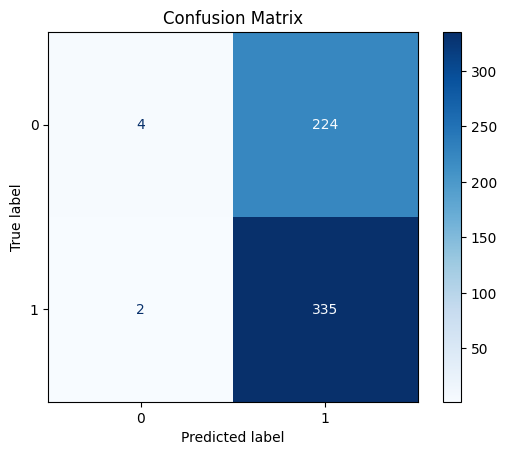

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_true = np.argmax(Y_test, axis=1)  # Convert one-hot encoded labels to class labels
y_pred = np.argmax(model_lstm_fc.predict(X_test), axis=1)  # Get predicted class labels

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.savefig("Confusion Matrix LSTM")
plt.show()


Model saved successfully!


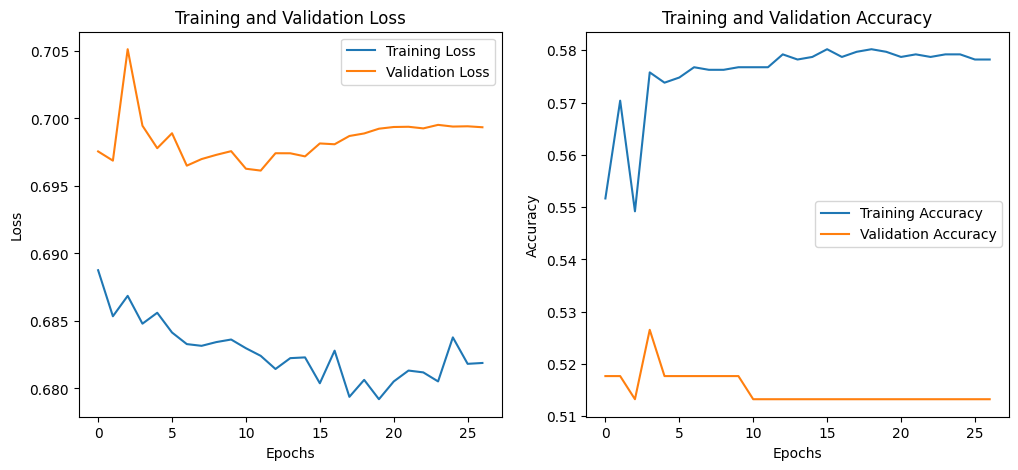

18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 724ms/step


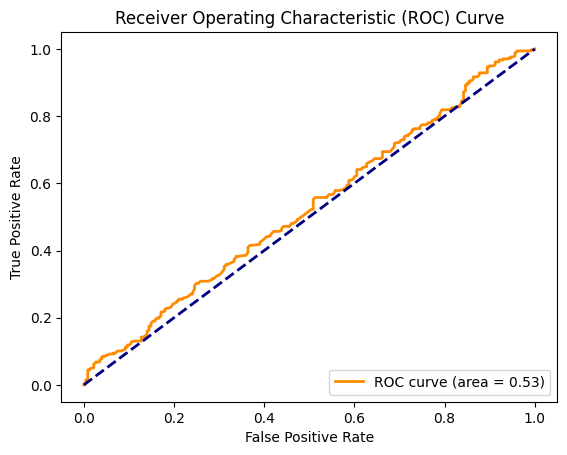

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Save the model
model_lstm_fc.save('model_lstm_fc.h5')
print("Model saved successfully!")

# Plotting Training and Validation Loss and Accuracy
def plot_history(history):
    # Plot loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.savefig("Training and Validation Accuracy and Training and Validation Loss")
    plt.show()



# Calculate and plot ROC curve
def plot_roc_curve(model, X_test, Y_test):
    # Get predictions
    y_pred_probs = model.predict(X_test)
    y_true = Y_test[:, 1] 
    y_pred_probs = y_pred_probs[:, 1]  # Probabilities for the positive class

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.savefig("ROC")
    plt.show()

# Call the function to plot
plot_history(history_lstm_fc)
# Call the function to plot the ROC curve
plot_roc_curve(model_lstm_fc, X_test, Y_test)
